All Imports

In [169]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import timeit
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler, StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.feature_selection import f_classif, SelectKBest
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV
from sklearn.metrics import f1_score, make_scorer, mean_squared_error, r2_score
import pickle

In [170]:
url = "https://raw.githubusercontent.com/4GeeksAcademy/linear-regression-project-tutorial/main/medical_insurance_cost.csv"
df = pd.read_csv(url)
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [171]:
df.isnull().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

In [172]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [173]:
df_num = df.select_dtypes(include=np.number)

In [174]:
df_cat = df.select_dtypes(include="O")

In [175]:
df_cat.head()

,sex,smoker,region
0,female,yes,southwest
1,male,no,southeast
2,male,no,southeast
3,male,no,northwest
4,male,no,northwest


In [176]:
le = LabelEncoder()

df_encoded= df_cat.apply(le.fit_transform)

In [177]:
df_encoded.head()

,sex,smoker,region
0,0,1,3
1,1,0,2
2,1,0,2
3,1,0,1
4,1,0,1


In [178]:
df_encoded = pd.concat([df_num, df_encoded], axis = 1)

In [179]:
df_encoded.head()

,age,bmi,children,charges,sex,smoker,region
0,19,27.900,0,16884.92400,0,1,3
1,18,33.770,1,1725.55230,1,0,2
2,28,33.000,3,4449.46200,1,0,2
3,33,22.705,0,21984.47061,1,0,1
4,32,28.880,0,3866.85520,1,0,1


INSET EDA HERE

<Axes: >

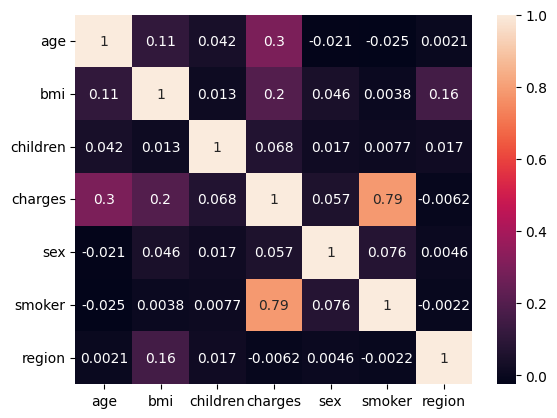

In [180]:
sns.heatmap(df_encoded.corr(), annot=True)

Test Train Split

In [181]:
# We divide the dataset into training and test samples
X = df_encoded.drop("charges", axis = 1)
y = df_encoded["charges"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

X_train.head()

,age,bmi,children,sex,smoker,region
560,46,19.95,2,0,0,1
1285,47,24.32,0,0,0,0
1142,52,24.86,0,0,0,2
969,39,34.32,5,0,0,2
486,54,21.47,3,0,0,1


<Axes: ylabel='Frequency'>

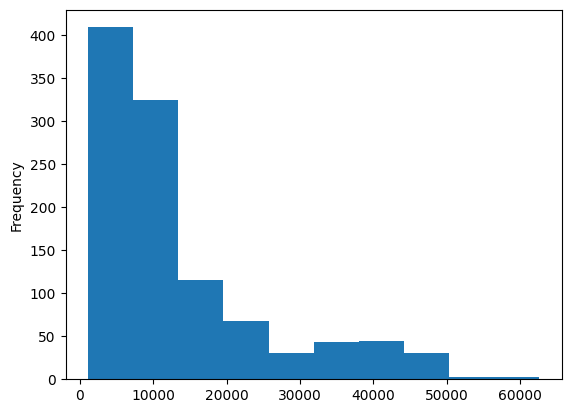

In [182]:
y_train.plot.hist()

<Axes: ylabel='Frequency'>

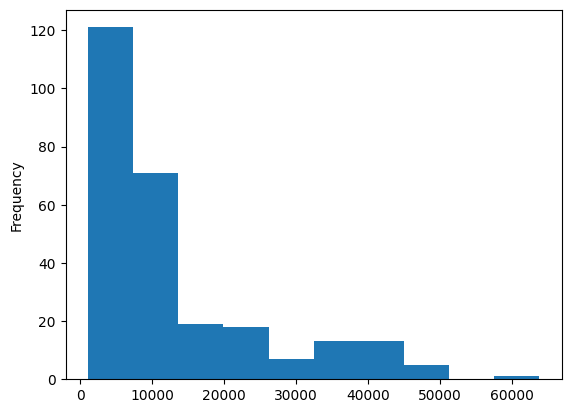

In [183]:
y_test.plot.hist()

In [184]:
X_train.to_csv("X_Train.csv")
y_train.to_csv("y_train.csv")
X_test.to_csv("X_test.csv")
y_test.to_csv("y_test.csv")

Feature Selection

In [185]:

selection_model = SelectKBest(f_classif, k = 6)
selection_model.fit(X_train, y_train)
ix = selection_model.get_support()
X_train = pd.DataFrame(selection_model.transform(X_train), columns = X_train.columns.values[ix])
X_test = pd.DataFrame(selection_model.transform(X_test), columns = X_test.columns.values[ix])

X_train.head()


/home/vscode/.local/lib/python3.10/site-packages/sklearn/feature_selection/_univariate_selection.py:109: RuntimeWarning: invalid value encountered in divide
  msw = sswn / float(dfwn)


,age,bmi,children,sex,smoker,region
0,46.0,19.95,2.0,0.0,0.0,1.0
1,47.0,24.32,0.0,0.0,0.0,0.0
2,52.0,24.86,0.0,0.0,0.0,2.0
3,39.0,34.32,5.0,0.0,0.0,2.0
4,54.0,21.47,3.0,0.0,0.0,1.0


In [186]:
scaler = MinMaxScaler()
scaler.fit(X_train)

X_train_scal = scaler.transform(X_train)
X_train_scal = pd.DataFrame(X_train_scal, index = X_train.index, columns = X_train.columns)

X_test_scal = scaler.transform(X_test)
X_test_scal = pd.DataFrame(X_test_scal, index = X_test.index, columns=X_test.columns)

X_train_scal.head()

,age,bmi,children,sex,smoker,region
0,0.608696,0.107345,0.4,0.0,0.0,0.333333
1,0.630435,0.224913,0.0,0.0,0.0,0.000000
2,0.739130,0.239440,0.0,0.0,0.0,0.666667
3,0.456522,0.493947,1.0,0.0,0.0,0.666667
4,0.782609,0.148238,0.6,0.0,0.0,0.333333


In [187]:
start_time = timeit.default_timer()
model = LinearRegression()
model.fit(X_train, y_train)
print("training elapsed time ", timeit.default_timer()-start_time)

training elapsed time  0.0017532710000978113


Assess Model

In [188]:
y_pred = model.predict(X_test)
y_pred

array([ 8924.40724442,  7116.29501758, 36909.01352144,  9507.87469118,
       27013.3500079 , 10790.77956153,   226.29844571, 16942.71599941,
        1056.63079407, 11267.91997309, 28048.59793155,  9424.36324087,
        5326.32232088, 38460.06017922, 40303.40597026, 37147.01010262,
       15287.91876684, 35965.05485917,  9179.1753067 , 31510.8319849 ,
        3797.79068365, 10070.82803304,  2312.57551348,  7074.41348194,
       11352.37224357, 12907.77079523, 14448.84678727,  6205.65997921,
        9917.00839638,  2239.50032819,  9060.55469043, 13120.56214535,
        4617.70702822,  3467.91218926,  4402.74821855, 12967.91608907,
        1927.44498944,  8757.9180081 , 33324.35180597, 32638.47697026,
        3852.41756615,  4370.39670883, 14080.76023234, 11478.63402576,
        8829.26135924, 12046.15119133,  5322.80515731,  3100.71182484,
       35546.60547574,  9201.61196817, 15894.23763341,  2406.04003607,
       12397.52052544,  1433.90617387, 13448.14094304, 12519.54174599,
      

In [189]:
print(mean_squared_error(y_test, y_pred))

33635210.43117841


In [190]:
print(r2_score(y_test, y_pred))

0.7833463107364538


In [ ]:
# We define the parameters that we want to adjust by hand
hyperparams = {
    "C": [0.001, 0.01, 0.1, 1, 10, 100, 1000],
    "penalty": ["l1", "l2", "elasticnet", None],
    "solver": ["newton-cg", "lbfgs", "liblinear", "sag", "saga"]
}

# We initialize the grid
random = RandomizedSearchCV(model, hyperparams, scoring = scorer, cv = 5)
random